In [28]:
%pip install --upgrade plotly pandas numpy plotly seaborn matplotlib nbformat scikit-learn

You should consider upgrading via the '/Users/jnibbs/PythonProject/coffee_dataset/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df_coffee = pd.read_csv('CoffeeSales.csv')
df_coffee

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472
...,...,...,...,...,...,...,...,...,...,...,...
725,12/26/2024,4,Hail,coffee beans,Colombian,40,26,1040,False,0,1040
726,12/27/2024,63,Mecca,coffee beans,Colombian,40,10,400,False,0,400
727,12/28/2024,39,Abha,coffee beans,Costa Rica,35,47,1645,False,0,1645
728,12/29/2024,57,Tabuk,coffee beans,Ethiopian,45,3,135,True,27,108


In [3]:
df_coffee.shape

(730, 11)

In [4]:
df_coffee.describe()

,Customer_ID,Unit Price,Quantity,Sales Amount,Discount_Amount,Final Sales
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,51.669863,36.794521,26.080822,959.924658,97.393151,862.531507
std,29.014339,4.955104,14.480971,551.282730,123.401350,509.032315
min,1.000000,30.000000,1.000000,30.000000,0.000000,24.000000
25%,27.250000,35.000000,14.000000,495.000000,0.000000,448.000000
50%,52.000000,35.000000,27.000000,960.000000,13.000000,840.000000
75%,77.000000,40.000000,39.000000,1400.000000,192.000000,1260.000000
max,100.000000,45.000000,49.000000,2205.000000,441.000000,2205.000000


In [5]:
df_coffee[:5]

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [6]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [7]:
df_coffee['Date'] = pd.to_datetime(df_coffee['Date'])


# Breakdown By City
---


In [8]:
sales_amount_per_city = df_coffee.groupby('City', as_index=False).agg({'Sales Amount': pd.Series.count})
sales_amount_per_city = sales_amount_per_city.sort_values('Sales Amount')


In [9]:
total_sales = df_coffee.groupby('City', as_index=False).agg({'Sales Amount':pd.Series.sum})
total_sales = total_sales.sort_values('Sales Amount')
total_sales.columns = ['City', 'Total Sales']


In [10]:
total_units = df_coffee.groupby('City', as_index=False).agg({'Quantity':pd.Series.sum})
total_units = total_units.sort_values('Quantity')


In [11]:
total_discounts = df_coffee.groupby('City', as_index=False).agg({'Discount_Amount':pd.Series.sum})
total_discounts.sort_values('Discount_Amount', inplace=True)
all_the_discounts = total_discounts.sum().values[1]
all_the_sales = total_sales.sum().values[1]

money_gave_away = all_the_discounts / all_the_sales * 100
money_gave_away
print(f'{money_gave_away:,.4}% of total sales went to discounts')

10.15% of total sales went to discounts


In [12]:
px.bar(sales_amount_per_city, x='City', y='Sales Amount', color='Sales Amount').update_layout(title='Total Purchases Made').update_yaxes(title='Purchases')


In [13]:
px.bar(total_sales, x=total_sales['City'], y=total_sales['Total Sales'], color=total_sales['Total Sales']).update_layout(title='Total Sales')

In [14]:
px.bar(total_units, x=total_units['City'], y=total_units['Quantity'], color=total_units['Quantity']).update_layout(title='Units Purchased')

In [15]:
px.bar(total_discounts, x=total_discounts['City'], y=total_discounts['Discount_Amount'], color=total_discounts['Discount_Amount']).update_layout(title='Amount Discounted')

In [16]:
total_sales['per_unit'] = round((total_sales['Total Sales'] - total_discounts['Discount_Amount']) / total_units['Quantity'], 2)

In [17]:
df_city_total = pd.merge(total_sales, total_discounts, on='City')
df_city_total = pd.merge(df_city_total, total_units, on='City')
df_city_total = pd.merge(df_city_total, sales_amount_per_city, on='City')
df_city_total.sort_values('Total Sales', inplace=True, ascending=False)
df_city_total['pct_of_discount'] = round(df_city_total['Discount_Amount'] /df_city_total['Discount_Amount'].sum() * 100, 2)
df_city_total

,City,Total Sales,per_unit,Discount_Amount,Quantity,Sales Amount,pct_of_discount
9,Hail,85495,32.97,8238,2343,87,11.59
8,Jeddah,79320,33.75,7272,2135,77,10.23
7,Riyadh,75595,33.94,7174,2016,79,10.09
6,Mecca,74735,32.95,8315,2016,77,11.70
5,Medina,70710,33.27,5897,1948,71,8.29
4,Khobar,67890,32.69,7901,1835,73,11.11
3,Dammam,67060,32.94,7085,1821,72,9.97
2,Buraidah,65500,31.79,8625,1789,69,12.13
1,Abha,58455,32.79,5624,1611,66,7.91
0,Tabuk,55985,33.46,4966,1525,59,6.98


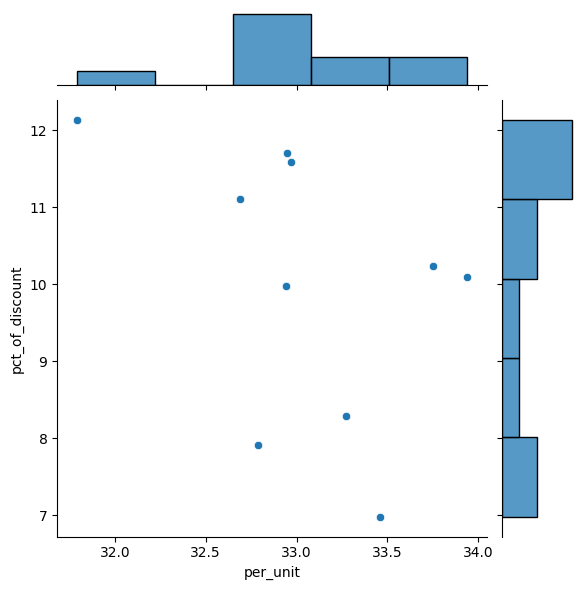

In [18]:
sns.jointplot(df_city_total, x='per_unit', y='pct_of_discount', )

# In Conclusion
## Discounted Coffee = Miscounted Funds
---

#### Key Takeaways
* 10.25% of the total revenue went to discounts

* 12.13% of the discounts went to Buraidah
  * While coming in 8th out of 10 cities in total sales Buraidah is number 1 in total discounts

That was after looking at the Cities Data now on to the product breakdown.



In [42]:
df_coffee[:1]

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales,month,year
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560,1,2023


## Product Breakdown
---

In [20]:
df_product = df_coffee.groupby('Product', as_index=False).agg({'Quantity':pd.Series.sum})
unit_avg = df_coffee.groupby('Product', as_index=False).agg({'Unit Price':pd.Series.mean})
product_sales = df_coffee.groupby('Product', as_index=False).agg({'Sales Amount':pd.Series.sum})
product_discounts = df_coffee.groupby('Product', as_index=False).agg({'Discount_Amount':pd.Series.sum})
df_product = pd.merge(df_product, unit_avg, on='Product')
df_product = pd.merge(df_product, product_sales, on='Product')
df_product = pd.merge(df_product, product_discounts, on='Product')
print(df_product)


      Product  Quantity  Unit Price  Sales Amount  Discount_Amount
0   Brazilian      3792        30.0        113760            10926
1   Colombian      4072        40.0        162880            18104
2  Costa Rica      4452        35.0        155820            14742
3   Ethiopian      3298        45.0        148410            14256
4   Guatemala      3425        35.0        119875            13069


In [21]:
df_product.sort_values('Quantity', inplace=True)
px.bar(df_product, y='Product', x='Quantity', color='Product', title='Quantity By Brand')

In [22]:
df_product.sort_values('Sales Amount', inplace=True)
px.bar(df_product, y='Product', x='Sales Amount', color='Product', title='Sales Amount By Brand')

In [23]:
px.bar(df_product, y='Product', x='Discount_Amount', color='Product', title='Discount Amount By Brand')

In [24]:
df_product.sort_values(by='Unit Price', inplace=True)
px.bar(df_product, y='Product', x='Unit Price', color='Product', title='Unit Price By Brand')

### Product Summary

Need to add...

## Breakdown by Time
---

In [ ]:
df_year = df_coffee
df_year['month'] = df_year['Date'].dt.month
df_year['year'] = df_year['Date'].dt.year
month_sum = df_year.groupby(['year', 'month'], as_index=False).agg({'Sales Amount':pd.Series.sum})
y23 = month_sum.query('year == 2023')
y24 = month_sum.query('year == 2024')

In [26]:
px.bar(y23, x='month', y='Sales Amount')

In [27]:
px.bar(y24, x='month', y='Sales Amount')

In [36]:
product_by_month = df_year.groupby(['year', 'month', 'Product'], as_index=False).agg({'Sales Amount':pd.Series.sum})
product_by_month

,year,month,Product,Sales Amount
0,2023,1,Brazilian,2220
1,2023,1,Colombian,7800
2,2023,1,Costa Rica,7910
3,2023,1,Ethiopian,7065
4,2023,1,Guatemala,2415
...,...,...,...,...
115,2024,12,Brazilian,6930
116,2024,12,Colombian,6000
117,2024,12,Costa Rica,9555
118,2024,12,Ethiopian,4770


In [37]:
px.sunburst(product_by_month, path=['year', 'month', 'Product', 'Sales Amount'])

In [38]:
px.bar(product_by_month, x='Product', y='Sales Amount', color='year')

In [39]:
y23[:1]

,year,month,Sales Amount
0,2023,1,27410


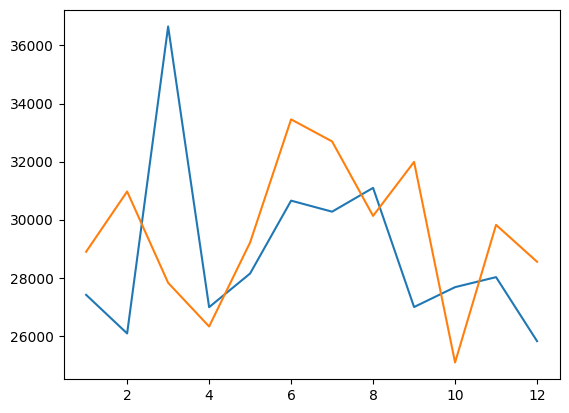

In [41]:
plt.plot(y23['month'], y23['Sales Amount'])
plt.plot(y24['month'], y24['Sales Amount'])

### Time Summary


This is for the time breakdown...